In [3]:
from tensorflow.keras.utils import image_dataset_from_directory
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

IMAGE_SIZE = 150

base_dir = "image_data"

train_dir = os.path.join(base_dir, "train_suits")
val_dir   = os.path.join(base_dir, "val_suits")
test_dir  = os.path.join(base_dir, "test_suits")


train_ds = image_dataset_from_directory(train_dir,
                                               batch_size = 20,
                                               image_size = (IMAGE_SIZE, IMAGE_SIZE))

val_ds = image_dataset_from_directory(val_dir,
                                      batch_size = 20,
                                      image_size = (IMAGE_SIZE, IMAGE_SIZE))     

Found 926 files belonging to 4 classes.
Found 28 files belonging to 4 classes.


In [2]:
train_ds.class_names

['clubs', 'diamonds', 'hearts', 'spades']

Get a batch and try to see the output from the datagen

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

#check_images, y = next(train_generator)

#print(check_images[0].shape)

#for i, image in enumerate(check_images):
##    plt.imshow(image)
#    plt.text(0, 0, y[i])
#    plt.show()

In [4]:
from tensorflow.keras import layers, Model
import tensorflow as tf

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomTranslation(0.2, 0.2),
  layers.RandomZoom(0.2, 0.2)
])



In [5]:
## build the model

# input
inputs = layers.Input(shape=(150, 150, 3))

# try adding our own conv block
x = resize_and_rescale(inputs)
x = data_augmentation(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPool2D(pool_size=2)(x)

# Finally add our inference layers
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(4, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,356,740 (5.18 MB)

 Trainable params: 1,356,740 (5.18 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow import keras
optimizer = keras.optimizers.RMSprop(learning_rate=1e-5)

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100
)


Epoch 1/100


/Users/harryhudson/Devel/cards/.venv/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.2674 - loss: 1.3960 - val_accuracy: 0.3929 - val_loss: 1.3577
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.3189 - loss: 1.3254 - val_accuracy: 0.4286 - val_loss: 1.0866
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.4459 - loss: 1.1669 - val_accuracy: 0.5357 - val_loss: 0.9621
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.4239 - loss: 1.0339 - val_accuracy: 0.4643 - val_loss: 0.9550
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.4380 - loss: 0.9772 - val_accuracy: 0.5000 - val_loss: 0.8616
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.4841 - loss: 0.9117 - val_accuracy: 0.6071 - val_loss: 0.7900
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - accuracy: 0.4468 - loss: 0.9640 - val_accuracy: 0.5357 - val_loss: 0.7496
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.4857 - loss: 0.8943 - val_accuracy: 0.6429

Text(0.5, 1.0, 'Training and validation loss')

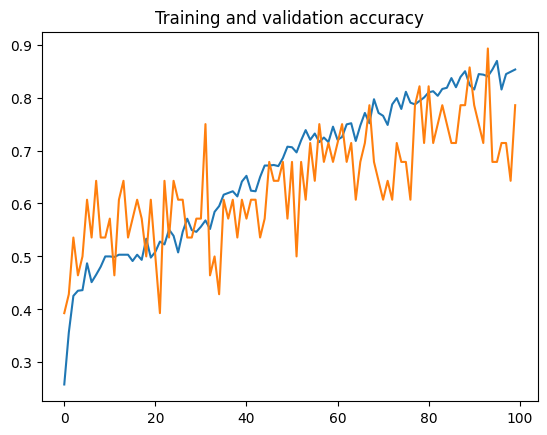

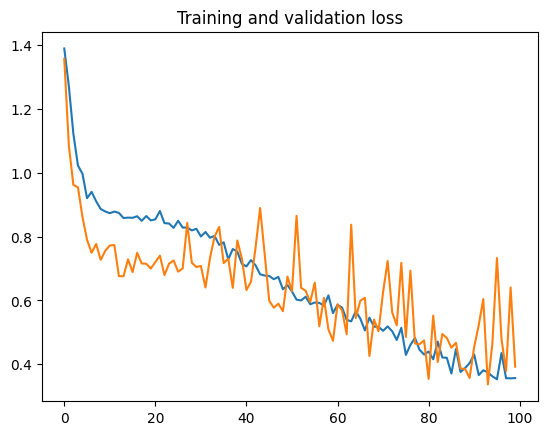

In [8]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )